In [2]:
from labo_instruments import SR830, KURIOS
import pandas as pd
import numpy as np
import pyvisa as visa
import time
import matplotlib.pyplot as plt
import os
from KURIOS_COMMAND_LIB import Kurios

🧪 Paquete labo-instruments cargado.
Clases disponibles, métodos y descripción breve:

📦 Osciloscopio Tektronix TDS1002B
   • config(self)
     ↪ Configura la escala vertical de los canales 1 y 2 y el tiempo horizontal por defecto.
   • get_channel(self, channel)
     ↪ Devuelve la configuración actual del canal especificado.
   • get_range(self, channel)
     ↪ Devuelve el rango de voltaje de la señal visible del canal especificado.
   • get_time(self)
     ↪ Devuelve la configuración horizontal del osciloscopio.
   • read_data(self, channel)
     ↪ Adquiere una forma de onda del canal especificado y la devuelve como arrays de tiempo y voltaje.
   • set_channel(self, channel, scale, zero=0)
     ↪ Configura la escala vertical y el offset de un canal.
   • set_time(self, scale, zero=0)
     ↪ Configura la escala horizontal (tiempo por división) y el desplazamiento.
   • unlock(self)
     ↪ Desbloquea el control manual del osciloscopio (libera el modo remoto).

📦 Multiplexor Agilent 3497

In [2]:
help(SR830)

Help on class SR830 in module labo_instruments.sr830:

class SR830(builtins.object)
 |  SR830(resource)
 |  
 |  Clase para el manejo amplificador Lockin SR830 usando PyVISA de interfaz
 |  
 |  Methods defined here:
 |  
 |  __del__(self)
 |      Finaliza la conexión con el Lock-in SR830 y desbloquea el panel frontal.
 |      
 |      Side Effects:
 |          - Envía el comando "LOCL 0" para habilitar el control manual del equipo.
 |          - Cierra la conexión VISA.
 |  
 |  __init__(self, resource)
 |      Inicializa la conexión con el Lock-in Amplifier SR830 mediante PyVISA.
 |      
 |      Args:
 |          resource (str): Dirección del recurso VISA del instrumento (por ejemplo, "GPIB0::8::INSTR").
 |      
 |      Side Effects:
 |          - Bloquea el panel frontal del equipo para evitar interacción manual.
 |          - Obtiene la escala y constante de tiempo actuales del equipo.
 |  
 |  auto_scale(self)
 |      Ajusta automáticamente la escala del Lock-in para optimizar l

In [15]:
rm = visa.ResourceManager()
print(rm.list_resources())
lockin = SR830('GPIB0::8::INSTR')

('ASRL1::INSTR', 'ASRL2::INSTR', 'ASRL3::INSTR', 'ASRL10::INSTR', 'ASRL11::INSTR', 'GPIB0::8::INSTR')
Stanford_Research_Systems,SR830,s/n81296,ver1.07 



# Barrido de voltaje

In [ ]:
X = []
Y = []
R = []
T = []
V = []

for i in np.linspace(-1.5,1,50):
    lockin.set_aux_out(3,i)  
    lockin.auto_scale()
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.2)

    V.append(i)
    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])
    

Listo (r=1.87585e-12, scale=2e-09)
[-8.52655e-13, -1.47794e-12]
[6.82124e-13, -82.236]
------------------
Listo (r=1.59162e-12, scale=2e-09)
[4.54751e-13, -1.13688e-13]
[1.08003e-12, 0.0]
------------------
Listo (r=7.38968e-13, scale=2e-09)
[3.97906e-13, -2.84219e-13]
[1.02319e-12, -43.728]
------------------
Listo (r=8.52655e-13, scale=2e-09)
[6.82124e-13, -1.53478e-12]
[1.76215e-12, -46.506]
------------------
Listo (r=1.36425e-12, scale=2e-09)
[5.11594e-13, -1.87585e-12]
[1.30741e-12, -56.31]
------------------
Listo (r=1.08003e-12, scale=2e-09)
[-5.11594e-13, -1.02319e-12]
[8.52655e-13, -100.494]
------------------
Listo (r=7.95811e-13, scale=2e-09)
[2.84219e-13, -7.38968e-13]
[1.02319e-12, -59.352]
------------------
Listo (r=1.70531e-13, scale=2e-09)
[3.97906e-13, -7.95811e-13]
[1.59162e-12, -73.074]
------------------
Listo (r=8.52655e-13, scale=2e-09)
[-1.13688e-13, -6.82124e-13]
[3.97906e-13, 0.0]
------------------
Listo (r=5.68438e-13, scale=2e-09)
[-3.41062e-13, -2.84219e-

In [143]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'V':V,
                     'R':R,
                     'T':T})

display(data)

,X,Y,V,R,T
0,-8.526550e-13,-1.477940e-12,-1.500000,6.821240e-13,-82.236
1,4.547510e-13,-1.136880e-13,-1.448980,1.080030e-12,0.000
2,3.979060e-13,-2.842190e-13,-1.397959,1.023190e-12,-43.728
3,6.821240e-13,-1.534780e-12,-1.346939,1.762150e-12,-46.506
4,5.115940e-13,-1.875850e-12,-1.295918,1.307410e-12,-56.310
5,-5.115940e-13,-1.023190e-12,-1.244898,8.526550e-13,-100.494
6,2.842190e-13,-7.389680e-13,-1.193878,1.023190e-12,-59.352
7,3.979060e-13,-7.958110e-13,-1.142857,1.591620e-12,-73.074
8,-1.136880e-13,-6.821240e-13,-1.091837,3.979060e-13,0.000
9,-3.410620e-13,-2.842190e-13,-1.040816,5.684380e-13,-119.358


<Figure size 640x480 with 0 Axes>

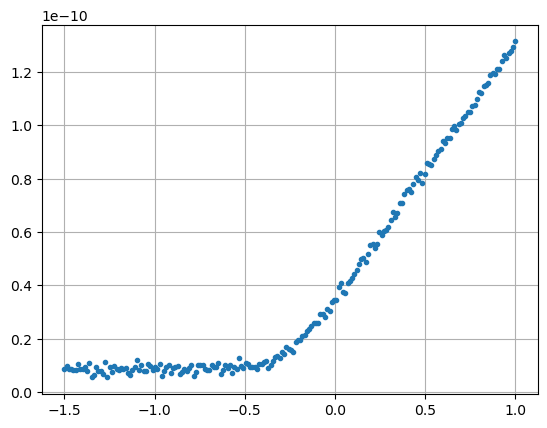

In [83]:
X = data['X']
Y = data['Y']
R = data['R']
T = data['T']
V = data['V']

plt.figure()
plt.subplots()
plt.plot(V,R,'.')
plt.grid()



In [ ]:
data.to_csv('Mediciones/barrido_voltaje_720nm.csv', index=False)

# Barrido de longitud de onda

In [ ]:
# Kurios.load_library("C:/Users/publico/Desktop/Efecto-fotoelectrico/KURIOS_COMMAND_LIB_Win64.dll")
# Kurios.list_devices()


[]

In [ ]:
X = []
Y = []
R = []
T = []

for i in np.linspace(420,730,311).astype('int'):
    lockin.set_aux_out(1,5)
    time.sleep(0.1)
    lockin.set_aux_out(1,0)
    lockin.set_aux_out(3,0.3)  
    lockin.auto_scale()
    medicionXY = lockin.get_medicion()
    medicionRT = lockin.get_medicion(False)
    print(medicionXY)
    print(medicionRT)
    print('------------------')
    time.sleep(0.1)

    X.append(medicionXY[0])
    Y.append(medicionXY[1])
    R.append(medicionRT[0])
    T.append(medicionRT[1])

[-4.56227e-10, -1.3074e-11]
[4.57193e-10, -178.44]
------------------
[-4.56852e-10, -1.24488e-11]
[4.57193e-10, -178.398]
------------------
[-4.5708e-10, -1.31877e-11]
[4.57364e-10, -178.428]
------------------
[-4.57478e-10, -1.25056e-11]
[4.57478e-10, -178.458]
------------------
[-4.56057e-10, -1.32446e-11]
[4.56682e-10, -178.362]
------------------
[-4.57876e-10, -1.14256e-11]
[4.56852e-10, -178.446]
------------------
[-4.56227e-10, -1.22782e-11]
[4.55602e-10, -178.536]
------------------
[-4.5725e-10, -1.33014e-11]
[4.57819e-10, -178.416]
------------------
[-4.5725e-10, -1.18803e-11]
[4.57364e-10, -178.524]
------------------
[-4.56341e-10, -1.2733e-11]
[4.56625e-10, -178.56]
------------------
[-4.58217e-10, -1.09708e-11]
[4.58387e-10, -178.716]
------------------


In [ ]:
data = pd.DataFrame({'X':X,
                     'Y':Y,
                     'R':R,
                     'T':T})

display(data)

,X,Y,R,T
0,-4.562270e-10,-1.307400e-11,4.571930e-10,-178.440
1,-4.568520e-10,-1.244880e-11,4.571930e-10,-178.398
2,-4.570800e-10,-1.318770e-11,4.573640e-10,-178.428
3,-4.574780e-10,-1.250560e-11,4.574780e-10,-178.458
4,-4.560570e-10,-1.324460e-11,4.566820e-10,-178.362
5,-4.578760e-10,-1.142560e-11,4.568520e-10,-178.446
6,-4.562270e-10,-1.227820e-11,4.556020e-10,-178.536
7,-4.572500e-10,-1.330140e-11,4.578190e-10,-178.416
8,-4.572500e-10,-1.188030e-11,4.573640e-10,-178.524
9,-4.563410e-10,-1.273300e-11,4.566250e-10,-178.560


In [ ]:
data.to_csv('Mediciones/corriente_longitud_550.csv', index=False)

# Prueba

In [9]:
wl = np.linspace(420,730,311).astype('int')
sequence = []
for i in np.arange(1,312):
    sequence.append(f'Step {i}')
sequence


['Step 1',
 'Step 2',
 'Step 3',
 'Step 4',
 'Step 5',
 'Step 6',
 'Step 7',
 'Step 8',
 'Step 9',
 'Step 10',
 'Step 11',
 'Step 12',
 'Step 13',
 'Step 14',
 'Step 15',
 'Step 16',
 'Step 17',
 'Step 18',
 'Step 19',
 'Step 20',
 'Step 21',
 'Step 22',
 'Step 23',
 'Step 24',
 'Step 25',
 'Step 26',
 'Step 27',
 'Step 28',
 'Step 29',
 'Step 30',
 'Step 31',
 'Step 32',
 'Step 33',
 'Step 34',
 'Step 35',
 'Step 36',
 'Step 37',
 'Step 38',
 'Step 39',
 'Step 40',
 'Step 41',
 'Step 42',
 'Step 43',
 'Step 44',
 'Step 45',
 'Step 46',
 'Step 47',
 'Step 48',
 'Step 49',
 'Step 50',
 'Step 51',
 'Step 52',
 'Step 53',
 'Step 54',
 'Step 55',
 'Step 56',
 'Step 57',
 'Step 58',
 'Step 59',
 'Step 60',
 'Step 61',
 'Step 62',
 'Step 63',
 'Step 64',
 'Step 65',
 'Step 66',
 'Step 67',
 'Step 68',
 'Step 69',
 'Step 70',
 'Step 71',
 'Step 72',
 'Step 73',
 'Step 74',
 'Step 75',
 'Step 76',
 'Step 77',
 'Step 78',
 'Step 79',
 'Step 80',
 'Step 81',
 'Step 82',
 'Step 83',
 'Step 84',
 

In [10]:
pasos = pd.DataFrame({'Sequence': sequence,'Wavelength(nm)':wl,'Interval(ms)':100})
display(pasos)
pasos.to_csv('pasos',index = False)

,Sequence,Wavelength(nm),Interval(ms)
0,Step 1,420,100
1,Step 2,421,100
2,Step 3,422,100
3,Step 4,423,100
4,Step 5,424,100
...,...,...,...
306,Step 307,726,100
307,Step 308,727,100
308,Step 309,728,100
309,Step 310,729,100
